# Goal

Using the "breast cancer Wisconsin" dataset to build a classifer for predicting whether a breast tumor is belign or malignant. 

# Take-away message

Build a classifer that achieved 95% recall (for the "malignant" class) on the test set (20% of the total data).  

## Data exploration

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

In [2]:
columns = ['id', 'clumpThickness', 'uniformityCellSize', 
           'uniformityCellShape', 'marginalAdhesion', 'singleEpithelialCellSize', 
          'bareNuclei', 'blandChromatin', 'normalNucleoli', 'mitoses', 'class']

In [3]:
df = pd.read_csv('breast-cancer-wisconsin.data', names=columns)
df.head()

,id,clumpThickness,uniformityCellSize,uniformityCellShape,marginalAdhesion,singleEpithelialCellSize,bareNuclei,blandChromatin,normalNucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
len(df)

699

In [5]:
df.shape

(699, 11)

In [6]:
df.describe().shape

(8, 10)

In [7]:
df[df.bareNuclei=='?']

,id,clumpThickness,uniformityCellSize,uniformityCellShape,marginalAdhesion,singleEpithelialCellSize,bareNuclei,blandChromatin,normalNucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


Replace "?" with nan:

In [8]:
df.loc[df.bareNuclei=='?', 'bareNuclei'] = np.nan
df['bareNuclei'] = df['bareNuclei'].astype(float)

In [9]:
df.head()

,id,clumpThickness,uniformityCellSize,uniformityCellShape,marginalAdhesion,singleEpithelialCellSize,bareNuclei,blandChromatin,normalNucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [10]:
df.isnull().sum()

id                           0
clumpThickness               0
uniformityCellSize           0
uniformityCellShape          0
marginalAdhesion             0
singleEpithelialCellSize     0
bareNuclei                  16
blandChromatin               0
normalNucleoli               0
mitoses                      0
class                        0
dtype: int64

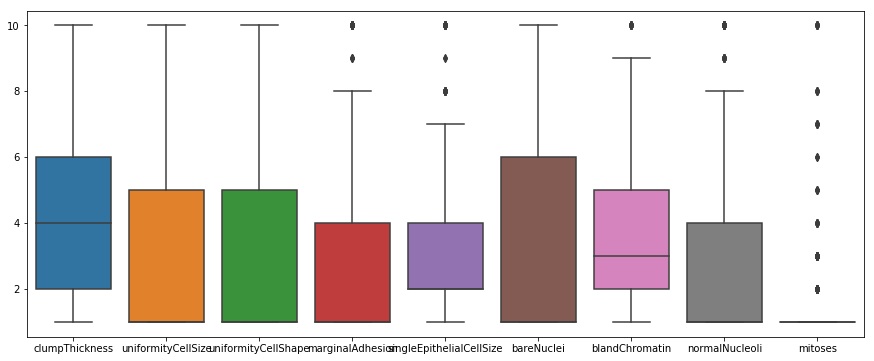

In [12]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[df.columns[1:-1]])

In [13]:
df.groupby('class').count()['id']

class
2    458
4    241
Name: id, dtype: int64

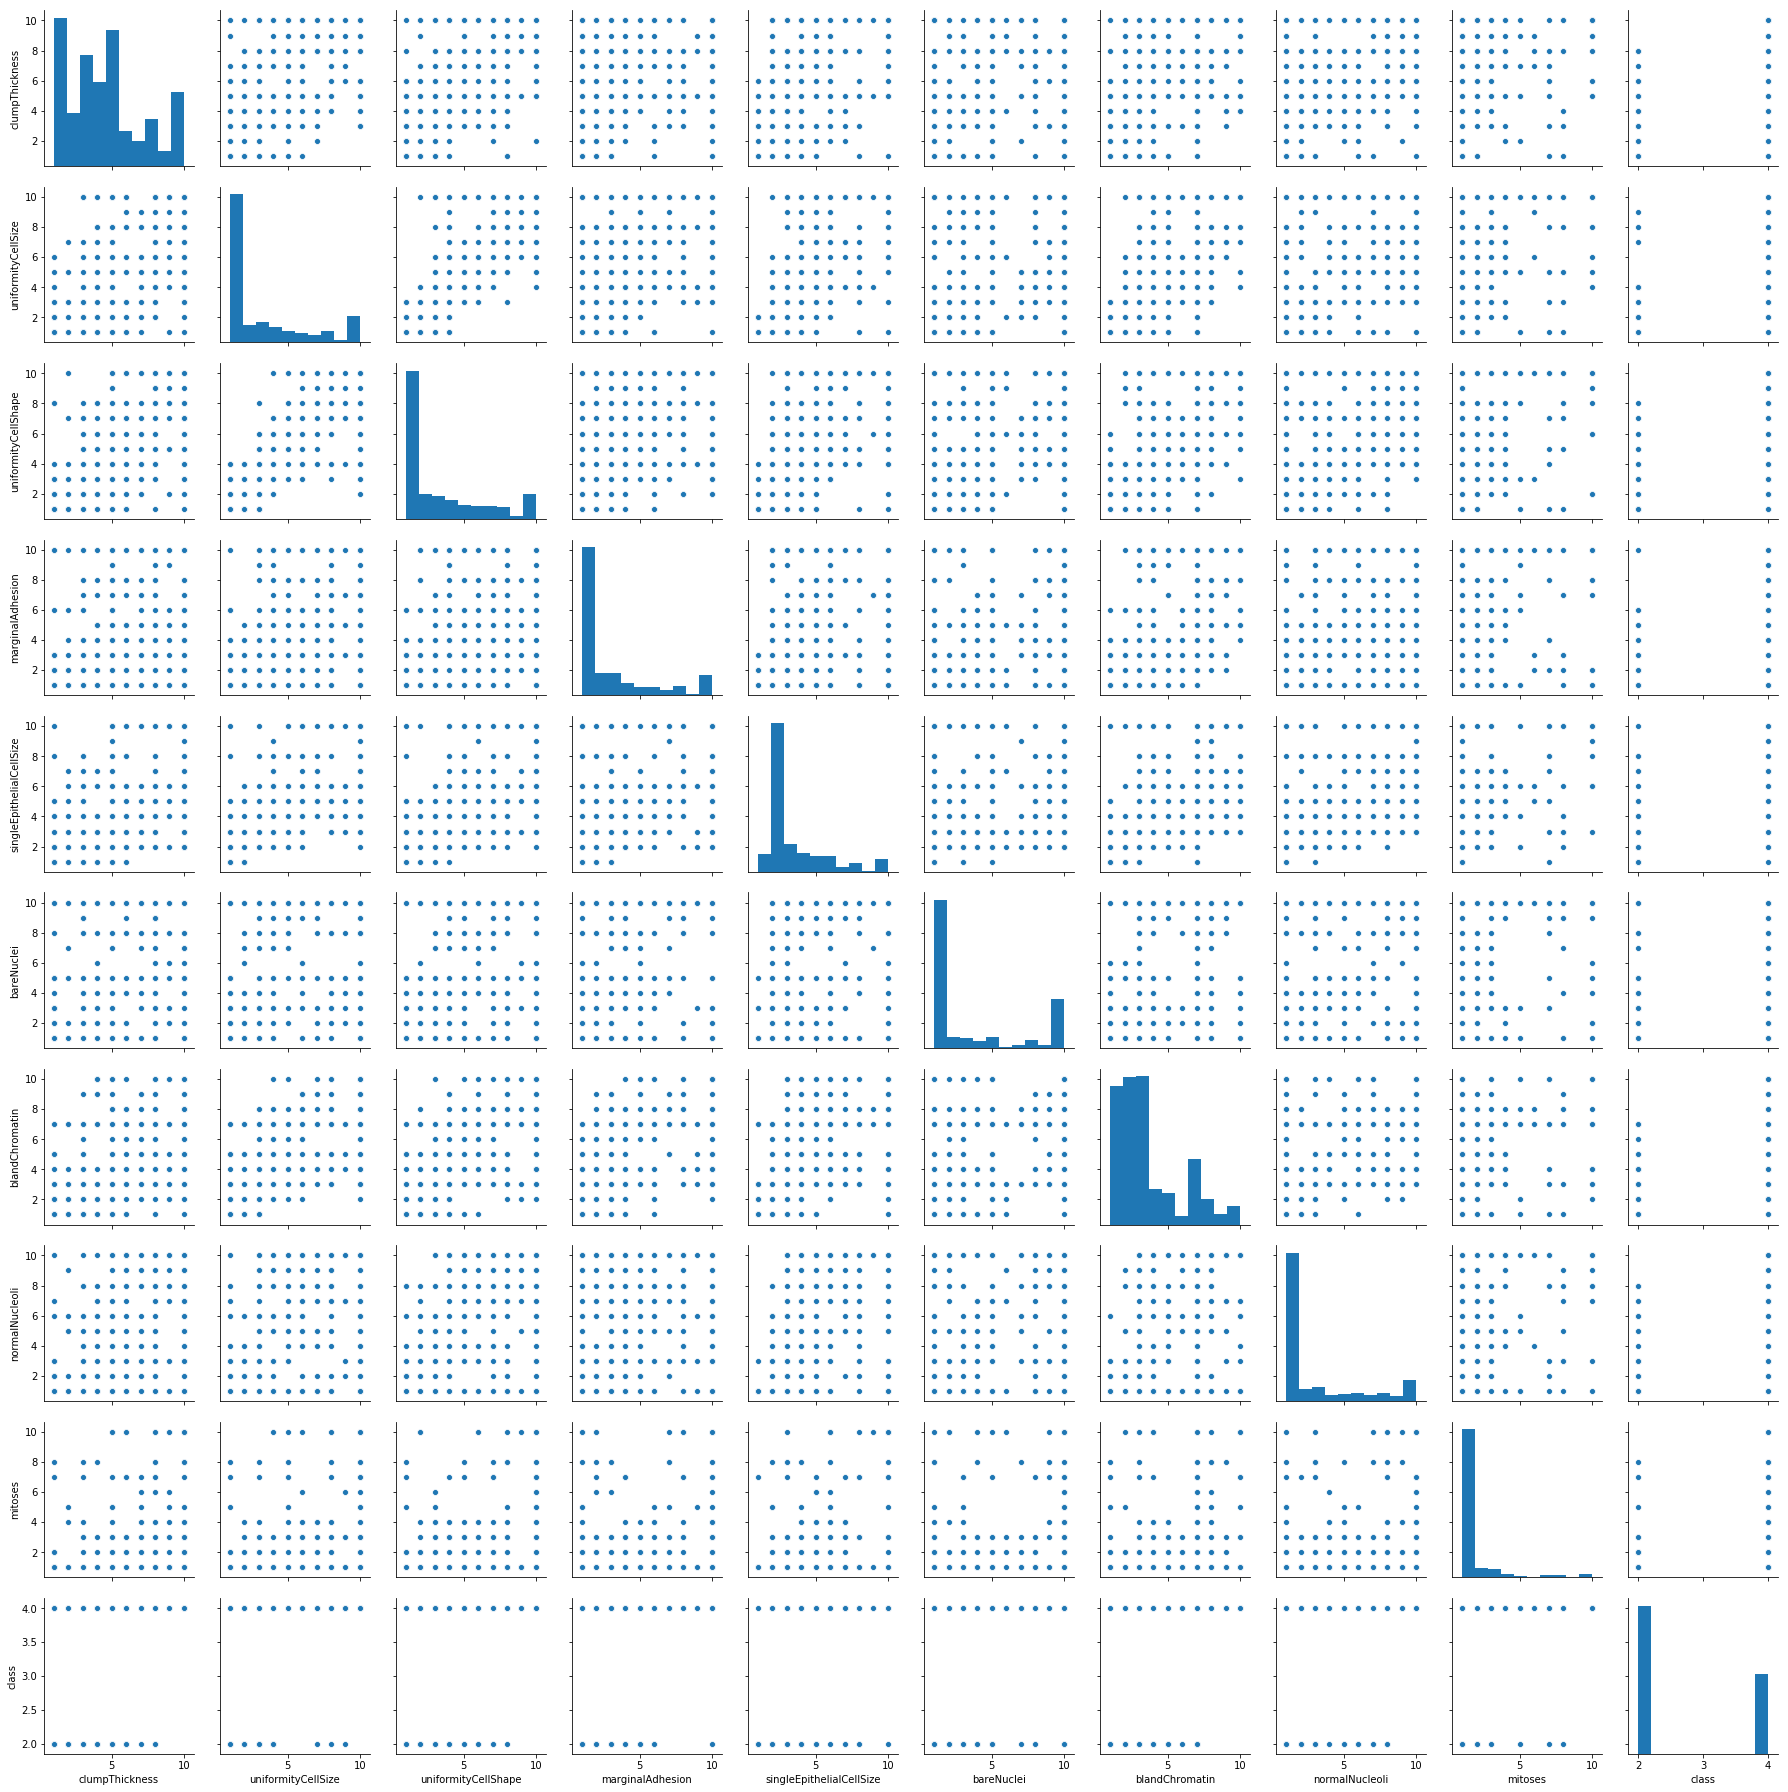

In [14]:
sns.pairplot(data=df[df.columns[1:]].dropna())

## Deal with missing values

Just do not use it for now - remove missing values:

In [15]:
len(df)

699

In [16]:
df = df.dropna()

In [17]:
len(df)

683

In [18]:
df = df.rename(columns={'class': 'label'})

In [19]:
df.head()

,id,clumpThickness,uniformityCellSize,uniformityCellShape,marginalAdhesion,singleEpithelialCellSize,bareNuclei,blandChromatin,normalNucleoli,mitoses,label
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


Change label: 2 (belign) --> 0; 4 (malignant) --> 1 :

In [24]:
df.loc[df.label==2, 'label'] = 0
df.loc[df.label==4, 'label'] = 1
df.head()

,id,clumpThickness,uniformityCellSize,uniformityCellShape,marginalAdhesion,singleEpithelialCellSize,bareNuclei,blandChromatin,normalNucleoli,mitoses,label
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


## Logistic regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

In [26]:
def split_train_test(df, train_percent=0.8,):
  n = len(df)
  IND = np.random.permutation(n)
  n_train = int(n * train_percent)
  train_IND = IND[:n_train]
  test_IND = IND[n_train:]
  train_df = df.iloc[train_IND]
  test_df = df.iloc[test_IND]

  feature_columns = df.columns.tolist()
  feature_columns.remove('id')
  feature_columns.remove('label')

  X = train_df[feature_columns]
  y = train_df.label.tolist()
  X_test = test_df[feature_columns]
  y_test = test_df.label.tolist()

  return train_df, test_df, X, y, X_test, y_test

In [27]:
_, _, X, y, X_test, y_test = split_train_test(df)

Hyperparameter tuning:

In [36]:
reg = LogisticRegression()
regularization_strength_range=(-2, 5)
cv_n_fold=10

Cs = 10 ** np.arange(- regularization_strength_range[1], - regularization_strength_range[0] + 1, 1.)
params = {'C': Cs}
clf = GridSearchCV(reg, params, cv=cv_n_fold)
clf.fit(X, y)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [37]:
clf.cv_results_

{'mean_fit_time': array([0.00294697, 0.00265172, 0.00222814, 0.00215809, 0.00218616,
        0.00301852, 0.00281055, 0.00279419]),
 'std_fit_time': array([9.39930584e-04, 7.97136569e-04, 6.77889549e-04, 8.10023430e-05,
        6.80618191e-05, 7.53557841e-04, 6.16300913e-04, 3.30076588e-04]),
 'mean_score_time': array([0.00105879, 0.00095186, 0.00065081, 0.00067136, 0.00063744,
        0.00095499, 0.00076065, 0.00067103]),
 'std_score_time': array([5.17010526e-04, 5.73891876e-04, 2.78523621e-05, 4.01027492e-05,
        7.69630536e-06, 3.67784136e-04, 3.23236708e-04, 6.44518449e-05]),
 'param_C': masked_array(data=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1e-05},
  {'C': 0.0001},
  {'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1.0},
  {'C': 10.0},
  {'C': 100.0}],
 'split0_test_score': array([0.32727273, 0.32727273, 0.90909091,

Choose C and train the model finally:

In [38]:
C = Cs[6]
C

10.0

In [39]:
reg = LogisticRegression(C=C)
reg.fit(X, y)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

accuracy on training set:

In [43]:
reg.score(X, y)

0.9706959706959707

accuracy on test set:

In [44]:
reg.score(X_test, y_test)

0.9635036496350365

Recall on training set:

In [45]:
recall_score(y, reg.predict(X))

0.9555555555555556

Recall on test set:

In [47]:
recall_score(y_test, reg.predict(X_test))

0.9491525423728814